In [1]:
import ml_development as ml
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = ml.read_csv("Loan_data.csv")
ml.check_missing_data(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


None

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Columns with missing data:
Gender: 13 missing rows
Married: 3 missing rows
Dependents: 15 missing rows
Self_Employed: 32 missing rows
LoanAmount: 22 missing rows
Loan_Amount_Term: 14 missing rows
Credit_History: 50 missing rows


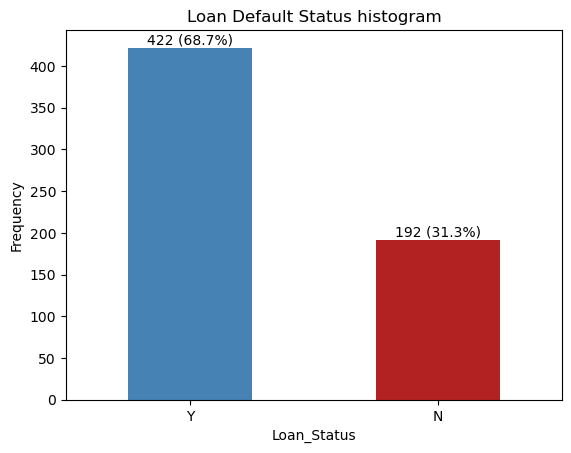

In [3]:
ml.checking_class_imbalance(data, 'Loan_Status', "Loan Default Status histogram")

In [4]:
filtered_df = ml.drop_missing_columns(data)
filtered_df.apply(lambda x: sum(x.isnull()))

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [5]:
len(filtered_df)

480

In [6]:
filtered_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


###### It is obvious from the above that Credit_History ranges from 0 and 1 which means it seems it is a binary category of 0 and 1 and treating as numerical data type is inappropriate.

In [8]:
filtered_df = ml.change_column_type(filtered_df, 'Credit_History', 'object')
filtered_df.Credit_History.info()

<class 'pandas.core.series.Series'>
Index: 480 entries, 1 to 613
Series name: Credit_History
Non-Null Count  Dtype 
--------------  ----- 
480 non-null    object
dtypes: object(1)
memory usage: 7.5+ KB


#### Distribution of the the numerical features.

It is important to check the distribution of the the numerical features as skewed data could impact the process of building the ML Model in that 

1. Outliers: Right-skewed distributions often have outliers on the higher end of the scale which often lead to biased or inaccurate results.

2. Normal Distribution Assumption: Some ML algorithms assume that the data is normally distributed whereas a Skewed data violates this.

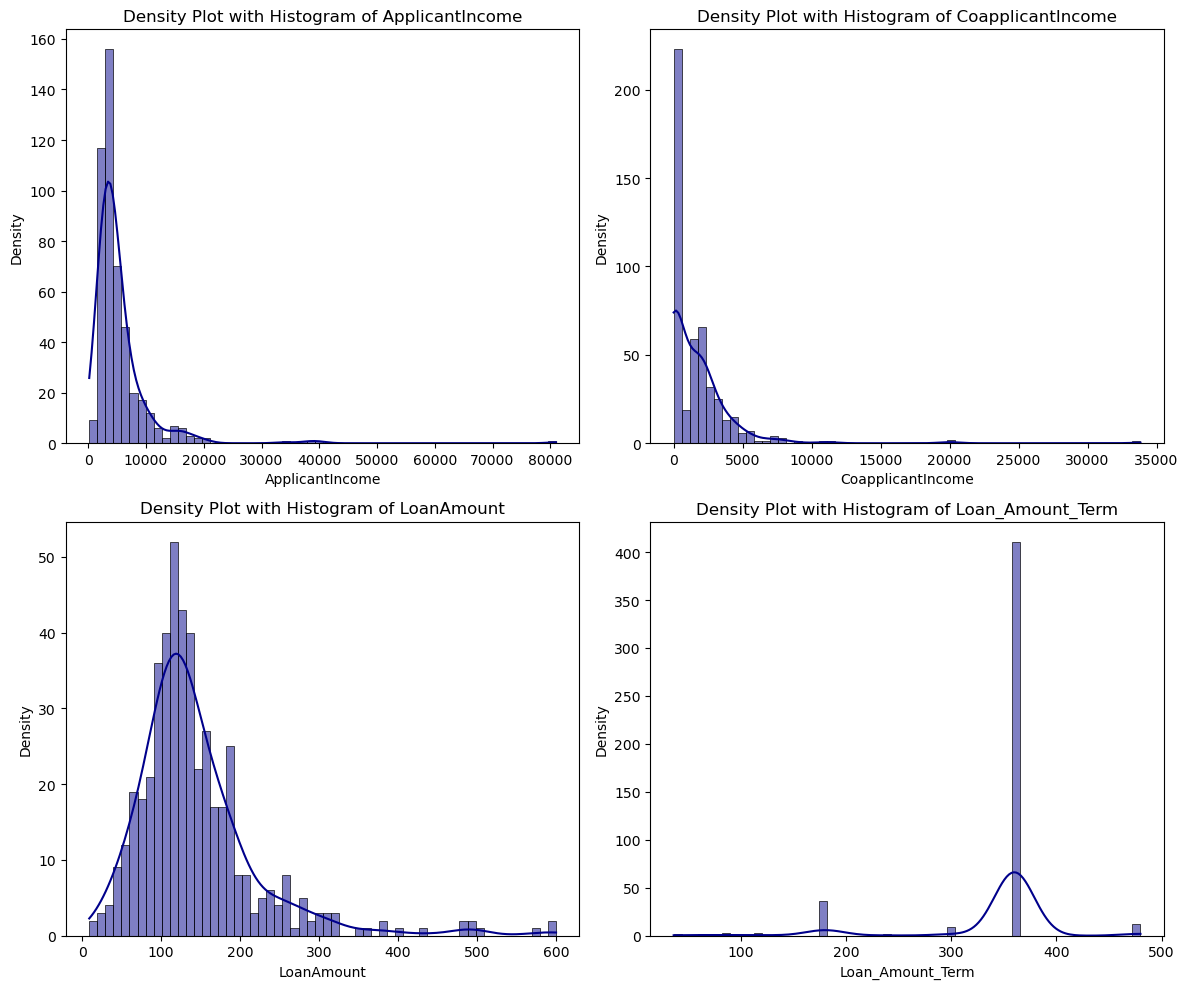

In [18]:
ml.plot_numeric_features(filtered_df)

Virtually all of the numerical features in the dataset have got one of element of skewness or the other

In [21]:
filtered_df = ml.treat_skewed_columns(filtered_df) 
filtered_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,8.430327,7.319202,4.859812,5.888878,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006701,0.000000,4.204693,5.888878,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.857094,7.765993,4.795791,5.888878,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699681,0.000000,4.955827,5.888878,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,8.597482,8.342125,5.590987,5.888878,1.0,Urban,Y


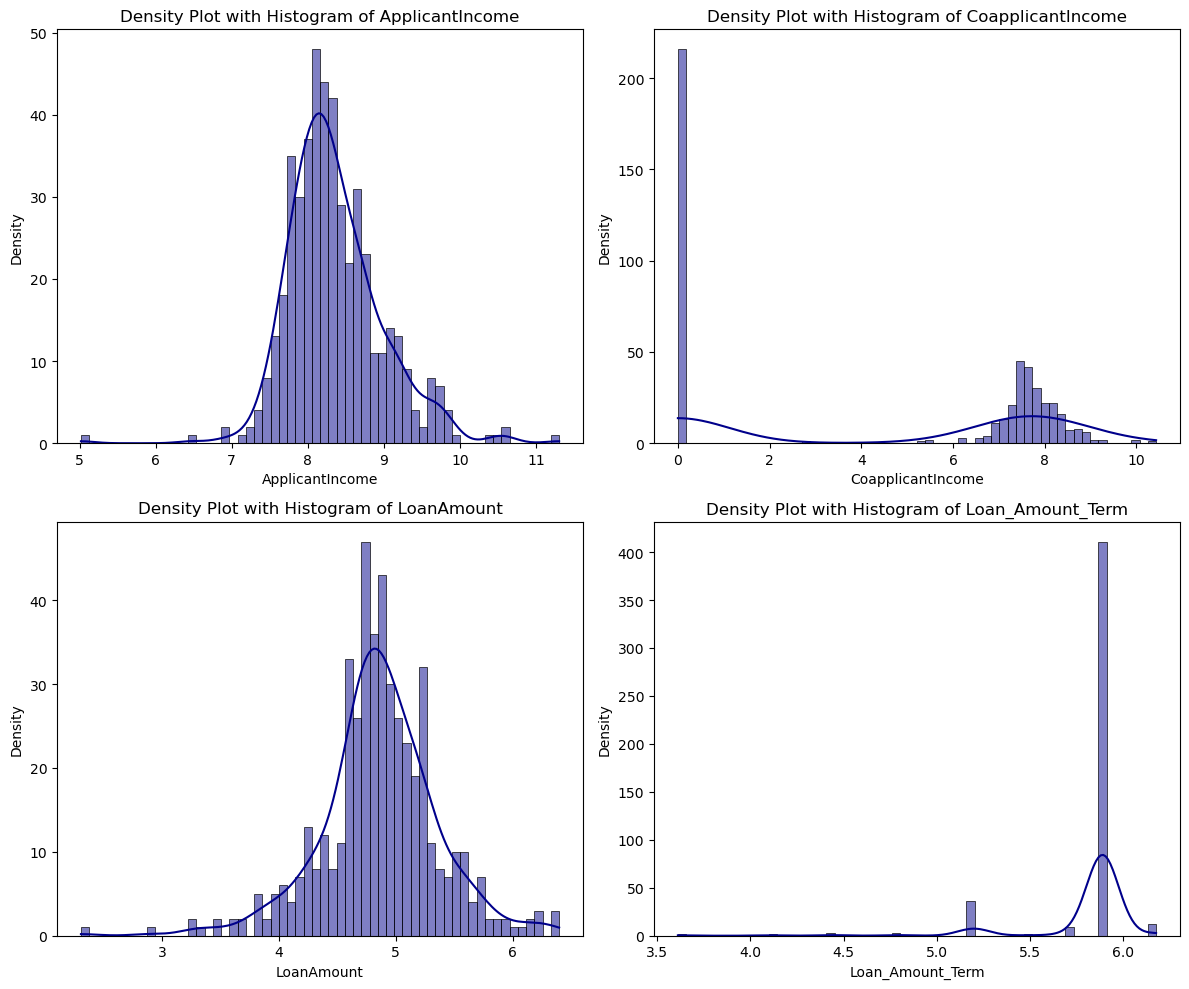

In [23]:
ml.plot_numeric_features(filtered_df)

In [25]:
filtered_df.to_csv('filtered_df.csv', index=False)